# Projections and Orthogonalization

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Projections in R^2

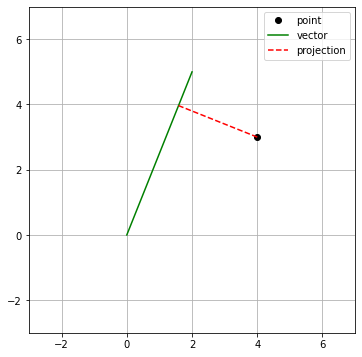

In [2]:
## Q: What is the closest distance between a point X and a line AB (i.e. a vector of length AB with a direction from A to B)?
## A: The length of a perpendicular from the point X to that line AB, let's call it point D
## Q: What scalar should be multiplied to the vector to convert it from length AB to length AD? 
## A: The Dot Product of two orthogonal vectors, AD(scaler * AB) and DX should be 0 
##
## Projection of x onto the vector AB = scaler * AB

# point x
x = np.array([4, 3])

# vector 
vec1 = np.array([2, 5])

# Scaler
scaler = (vec1.T @ x) / (vec1.T @ vec1)

# Plotting
plt.figure(figsize = (12, 6))
plt.plot(x[0], x[1], 'ko', label = 'point')
plt.plot([0, vec1[0]], [0, vec1[1]], 'g', label = "vector")

plt.plot([x[0], scaler * vec1[0]], [x[1], scaler * vec1[1]], 'r--', label = 'projection')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-3, 7, -3, 7))
plt.show()
print("\n\n")

## Projections in R^N

In [3]:
## Q: What if we had a matrix instead of a vector and a vector instead of a point in the previous example?
## A: projection of a vector x on matrix A = y * matrix A, where the y vector equals (A'A)^-1 * A' * x,    iff A'A is invertible

# dimensions
m = 15
n = 10

# matrix
mat1 = np.random.randint(1, 100, (m, n))

# vector
x1 = np.random.randint(1, 100, (m, 1))

# implementatio 1
y1 = np.linalg.inv(mat1.T @ mat1) @ (mat1.T @ x1)
print(np.round(y1.T, 3), "\n\n")

# implementation 2
y2 = np.linalg.solve(mat1.T @ mat1, mat1.T @ x1)
print(np.round(y2.T, 3), "\n\n")

[[-0.471 -0.101  0.793  0.011  0.228  0.482 -0.021  0.37  -0.374  0.357]] 


[[-0.471 -0.101  0.793  0.011  0.228  0.482 -0.021  0.37  -0.374  0.357]] 




## Projections in R^3

[[ 0.78144588 -0.03217718]] 


[[10  5 13]] 


[[10.747  8.798  7.396]] 




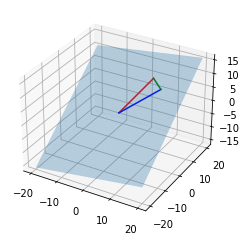

In [28]:
# dimensions
m = 3
n = 2

# matrix
mat2 = np.random.randint(5, 20, (m, n))

# vector
x2 = np.random.randint(1, 25, (m, 1))


y3 = np.linalg.solve(mat2.T @ mat2, mat2.T @ x2)
print(y3.T, "\n\n")


# projection
proj = mat2 @ y3

print(x2.T, "\n\n")
print(np.round(proj.T, 3), "\n\n")


# Plot
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.gca(projection ='3d')

# plotting the vectors
ax.plot([0, x2[0]], [0, x2[1]], [0, x2[2]], 'r')
ax.plot([0, proj[0]], [0, proj[1]], [0, proj[2]], 'b')

# plot the projection line
ax.plot( [proj[0][0], x2[0]],
         [proj[1][0], x2[1]],
         [proj[2][0], x2[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-20, 20), np.linspace(-20, 20))
cp = np.cross(mat2[:, 0], mat2[:, 1])
z1 = (-cp[0] * xx - cp[1] * yy) / cp[2]
ax.plot_surface(xx, yy, z1, alpha = .3)
plt.show()
print("\n\n")

## Vector  Decomposition

[0. 0.] 

0.0 




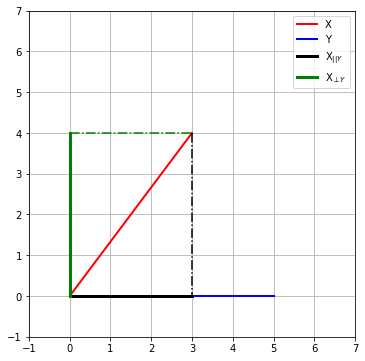

In [23]:
## Breaking a vector X into two components, one parallel and the other perpendicular to another vector Y
## Here, vector Y is the reference vector
## Component parallel to vector Y: we compute the projection of vector X on the vector Y  -->  (also equal to vector X . cos(phi), where phi = angle between the vectors)
## Component perpendicular to vector Y = vector X - (projection of vector X on vector Y)

# vector X (to be decomposed)
x = np.array([3, 4])
# vector Y (reference)
y = np.array([5, 0])

# computing the component parallel to vector Y
scaler = np.dot(x, y) / np.dot(y, y)                  # <---------- or ((x.T @ y) / (y.T @ y))
x_parallel_y = scaler * y

# computing the component perpendicular to vector Y
x_perpedicular_y = x - (x_parallel_y)

# confirm
print((x_parallel_y + x_perpedicular_y) - x, "\n")    # <---------- must equal 0
print(np.dot(x_parallel_y, x_perpedicular_y), "\n\n") # <---------- must equal 0

# plot
plt.figure(figsize= (12, 6))
plt.plot([0, x[0]], [0, x[1]], 'r', linewidth = 2)  
plt.plot([0, y[0]], [0, y[1]], 'b', linewidth = 2)
plt.plot([0, x_parallel_y[0]], [0, x_parallel_y[1]], 'k', linewidth = 3)
plt.plot([0, x_perpedicular_y[0]], [0, x_perpedicular_y[1]], 'g', linewidth = 3)
plt.plot([x_parallel_y[0], x[0]], [x[1], x_parallel_y[1]], 'k-.')
plt.plot([x_perpedicular_y[0], x[0]], [x[1], x_perpedicular_y[1]], 'g-.')

plt.legend(['X', 'Y', 'X$_{|| Y}$', 'X$_{\perp Y}$'])
plt.axis('square')
plt.grid()
plt.axis([-1, 7, -1, 7])
plt.show()
print("\n\n")

## QR Decomposition

In [29]:
## A = Q . R, where Q is the orthogonal matrix that is achieved by the Gram-Schmidt procedure on A
## From A ---> Q (Gram-Scmidt procedure)
## Q: But how to get from Q ---> A (to get back the information lost from the above procedure)
## A: A = Q . R    =>    Q' . A = (Q' . Q) . R   =>   Q' . A = R    (Q'Q = 1, as Q is an orthogonal matrix)

### One interesting fact about the R matrix: "It will always be an upper traingular matrix"

mat3 = [ [1, 0],
         [1, 0],
         [0, 0] ]

# QR Decomposition 
mat4, mat5 = np.linalg.qr(mat3, 'complete')
print(mat4, "\n\n")               # Q ---> square matrix

# "economy" QR Decmposition (default)
mat6, mat7 = np.linalg.qr(mat3)
print(mat6, "\n\n")               # Q ---> rectangular matrix 

[[-0.70710678 -0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.         -0.          1.        ]] 


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]
 [-0.         -0.        ]] 




[[-0.16439899 -0.98639392]
 [-0.98639392  0.16439899]] 


[[-3.041381 -1.479591 -4.274374]
 [ 0.       -2.794783 -1.315192]] 


[[-3.041381 -1.479591 -4.274374]
 [-0.       -2.794783 -1.315192]] 




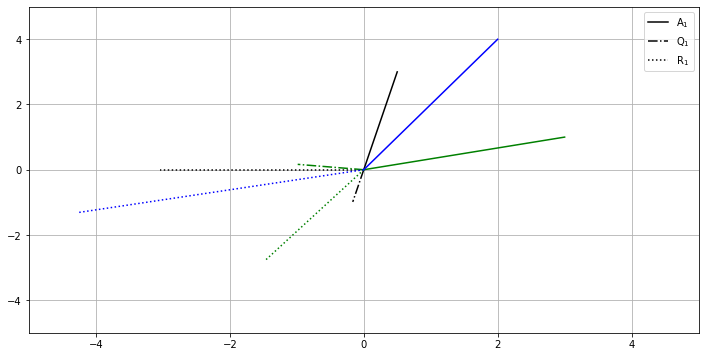

In [30]:
mat8 = np.array([ [0.5, 3, 2], [3, 1, 4] ])
# QR Decomposition
mat9, mat10 = np.linalg.qr(mat8, 'complete')
print(mat9, "\n\n")               # Q
print(np.round(mat10, 6), "\n\n") # R

# Calculating R using Q'A
mat11 = mat9.T @ mat8
print(np.round(mat11, 6), "\n\n") # R

# plotting
colours = 'kgb'
plt.figure(figsize= (12, 6))

for i in range(0, np.shape(mat8)[1]):
    
    # plot original vector A
    plt.plot([0, mat8[0, i]], [0, mat8[1, i]], colours[i])
    
    # plot orthogonalized vector Q
    if i < np.shape(mat9)[1]:
        plt.plot([0, mat9[0, i]], [0, mat9[1, i]], colours[i], linestyle = '-.')
    
    # plot residual vector R
    plt.plot([0, mat10[0, i]], [0, mat10[1,i]], colours[i], linestyle = ':')

    
plt.legend(['A$_1$', 'Q$_1$', 'R$_1$'])

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)

plt.show()
print("\n\n")

## Gram-Schmidt Prcedure

[[ 1. -0.  0. -0.]
 [-0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [-0.  0.  0.  1.]] 




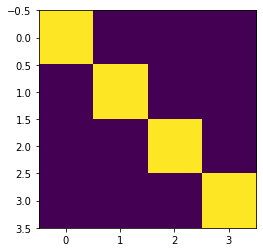




[[-0.4857  0.8405 -0.0142 -0.2397]
 [-0.7064 -0.4566  0.5028 -0.1994]
 [-0.4415 -0.266  -0.8568  0.0126]
 [-0.2649  0.1198  0.1133  0.9501]] 

[[ 0.4857  0.8405  0.0142  0.2397]
 [ 0.7064 -0.4566 -0.5028  0.1994]
 [ 0.4415 -0.266   0.8568 -0.0126]
 [ 0.2649  0.1198 -0.1133 -0.9501]] 




In [31]:
m = 4
n = 4

mat12 = np.random.randint(1, 20, (m, n))
mat13 = np.zeros((m, n))   # empty matrix to store the value of Orthogonal matrix

# Loop over the columns 
for i in range(n):
    mat13[:, i] = mat12[:, i]
    A = mat12[:, i]
    
    # orthogonalize the ith column in mat12 realtive to the previous columns that have been sored in mat13
    for j in range(i):
        Q = mat13[:, j]
        mat13[:, i] = mat13[:, i] - (np.dot(A, Q) / np.dot(Q, Q) * Q)   # the component of A that is perpedicular to the reference vector Q[:, i]
        
    # normalizing the ith column in mat13, (i.e. magnotude = 1)
    mat13[:, i] = mat13[:, i] / np.linalg.norm(mat13[:, i])             # Dividing by the magnitude


## Check if Q is an orthogonal matrix
print(np.round(mat13.T @ mat13, 4), "\n\n")                             # must be an Identity matrix
plt.imshow(mat13.T @ mat13)
plt.show()
print("\n\n")

## Checking Q
mat14, mat15 = np.linalg.qr(mat12, "complete")
print(np.round(mat14, 4), "\n")  
print(np.round(mat13, 4), "\n\n")    

## Sherman-Morrison formula

In [32]:
## (I - ab')^-1 = I + ab' / (1 - a'b)

m = 4
mat16 = np.random.randn(m)    # a
mat17 = np.random.randn(m)    # b

# I - ab'
mat18 = np.eye(m) - np.outer(mat16, mat17)

# I - ab' / (1 - a'b) 
mat19 = np.eye(m) + np.outer(mat16, mat17) / (1 - np.dot(mat16, mat17))

print(np.round(mat18 @ mat19, 2), "\n\n")  # must be an indentity matrix


## Failure condition
## But what if both a = b and both of them are unit vectors
mat20 = mat21 = mat16 / np.linalg.norm(mat16)
# I - ab'
mat22 = np.eye(m) - np.outer(mat20, mat21)

# I - ab' / (1 - a'b) 
mat23 = np.eye(m) + np.outer(mat20, mat21) / (1 - np.dot(mat20, mat21))

print(np.round(mat22 @ mat23, 2), "\n\n")  # will not be equal to an indentity matrix

[[ 1.  0. -0. -0.]
 [ 0.  1. -0. -0.]
 [ 0.  0.  1.  0.]
 [-0. -0. -0.  1.]] 


[[ 1.06 -0.12  0.    0.  ]
 [-0.09  0.62 -0.06  0.01]
 [ 0.   -0.25  0.88  0.  ]
 [ 0.    0.01  0.    1.  ]] 


